In [398]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [399]:
data = pd.read_csv('csv_files/kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.00000,3,1.00000,1180,5650,1.00000,nan,0.00000,...,7,1180,0.0,1955,0.00000,98178,47.51120,-122.25700,1340,5650
1,6414100192,12/9/2014,538000.00000,3,2.25000,2570,7242,2.00000,0.00000,0.00000,...,7,2170,400.0,1951,1991.00000,98125,47.72100,-122.31900,1690,7639
2,5631500400,2/25/2015,180000.00000,2,1.00000,770,10000,1.00000,0.00000,0.00000,...,6,770,0.0,1933,nan,98028,47.73790,-122.23300,2720,8062
3,2487200875,12/9/2014,604000.00000,4,3.00000,1960,5000,1.00000,0.00000,0.00000,...,7,1050,910.0,1965,0.00000,98136,47.52080,-122.39300,1360,5000
4,1954400510,2/18/2015,510000.00000,3,2.00000,1680,8080,1.00000,0.00000,0.00000,...,8,1680,0.0,1987,0.00000,98074,47.61680,-122.04500,1800,7503


# 1. Inspect Data

In [400]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [401]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.00000,21597.00000,21597.00000,21597.00000,21597.00000,21597.00000,21597.00000,19221.00000,21534.00000,21597.00000,21597.00000,21597.00000,21597.00000,17755.00000,21597.00000,21597.00000,21597.00000,21597.00000,21597.00000
mean,4580474287.77099,540296.57351,3.37320,2.11583,2080.32185,15099.40876,1.49410,0.00760,0.23386,3.40983,7.65792,1788.59684,1970.99968,83.63678,98077.95185,47.56009,-122.21398,1986.62032,12758.28351
std,2876735715.74778,367368.14010,0.92630,0.76898,918.10613,41412.63688,0.53968,0.08682,0.76569,0.65055,1.17320,827.75976,29.37523,399.94641,53.51307,0.13855,0.14072,685.23047,27274.44195
min,1000102.00000,78000.00000,1.00000,0.50000,370.00000,520.00000,1.00000,0.00000,0.00000,1.00000,3.00000,370.00000,1900.00000,0.00000,98001.00000,47.15590,-122.51900,399.00000,651.00000
25%,2123049175.00000,322000.00000,3.00000,1.75000,1430.00000,5040.00000,1.00000,0.00000,0.00000,3.00000,7.00000,1190.00000,1951.00000,0.00000,98033.00000,47.47110,-122.32800,1490.00000,5100.00000
50%,3904930410.00000,450000.00000,3.00000,2.25000,1910.00000,7618.00000,1.50000,0.00000,0.00000,3.00000,7.00000,1560.00000,1975.00000,0.00000,98065.00000,47.57180,-122.23100,1840.00000,7620.00000
75%,7308900490.00000,645000.00000,4.00000,2.50000,2550.00000,10685.00000,2.00000,0.00000,0.00000,4.00000,8.00000,2210.00000,1997.00000,0.00000,98118.00000,47.67800,-122.12500,2360.00000,10083.00000
max,9900000190.00000,7700000.00000,33.00000,8.00000,13540.00000,1651359.00000,3.50000,1.00000,4.00000,5.00000,13.00000,9410.00000,2015.00000,2015.00000,98199.00000,47.77760,-121.31500,6210.00000,871200.00000


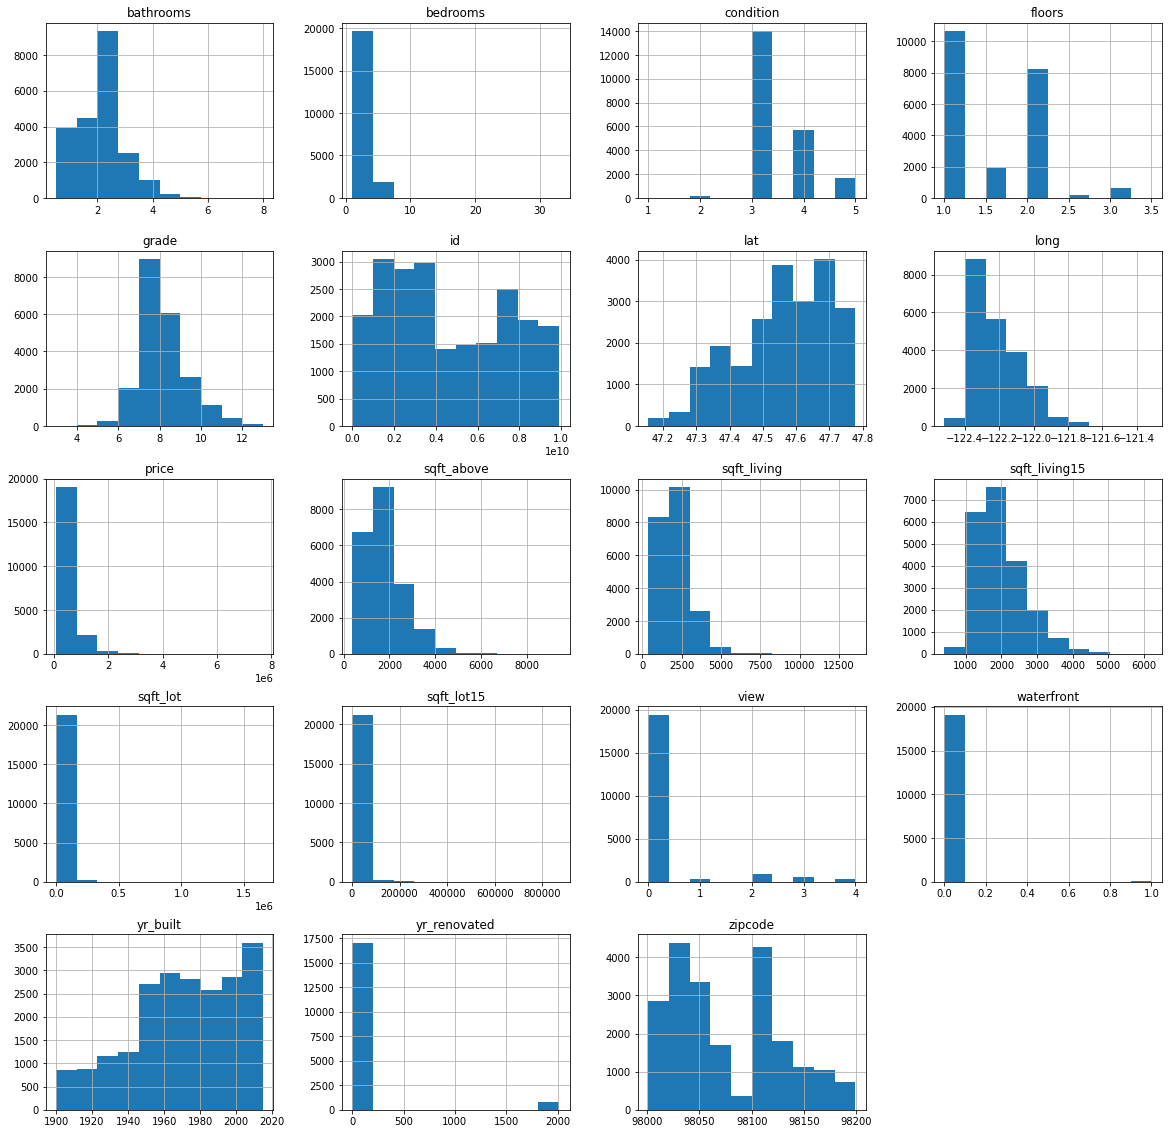

In [402]:
data.hist(figsize=(20,20));

# 2. Data Cleaning

## Missing Null Values

In [403]:
def find_null_cols(df):
    df_clone = df.copy()
    print('\'NaN\' found in columns as follows:')
    for col in df_clone.columns:
        if (df_clone[col].isnull().any()) | (df_clone[col].isna().any()):
            print(f'\t{col:30} contains {df_clone[col].isna().sum():10} null values ({df_clone[col].isna().sum()*100/df_clone.shape[0]:5.2f}%) !')
    return None

find_null_cols(data)

'NaN' found in columns as follows:
	waterfront                     contains       2376 null values (11.00%) !
	view                           contains         63 null values ( 0.29%) !
	yr_renovated                   contains       3842 null values (17.79%) !


### Waterfront

Description: House which has a view to a waterfront

Data: Data includes binary numbers of 0 and 1

* There are 2376 rows with missing values (11% of total rows). I can either categorize the column as categorical data or keep it as an float.
* My assumption is that the null values means there is no waterfront. Since there are more houses with no waterfronts, I can change the null values to 0 which won't affect the data very much.
* I can delete the rows with null values but it will remove 11% of the overall data.

Result: Because I consider this an important feature, I decided to drop the rows with null values so it doesn't skew the data.

In [404]:
pd.concat([data['waterfront'].value_counts(dropna=False),
           round((data['waterfront'].value_counts(dropna=False,normalize=True) * 100),2).rename("%")],axis=1)                

,waterfront,%
0.00000,19075,88.32000
nan,2376,11.00000
1.00000,146,0.68000


In [405]:
# drops rows from dataset where waterfront has nan values
data = data[data['waterfront'].notna()]

In [406]:
# waterfront column result
data['waterfront'] = data['waterfront'].fillna(0.0)
pd.concat([data['waterfront'].value_counts(dropna=False),
           round((data['waterfront'].value_counts(dropna=False,normalize=True) * 100),2).rename("%")],axis=1) 

,waterfront,%
0.00000,19075,99.24000
1.00000,146,0.76000


In [407]:
data['waterfront'] = data['waterfront'].astype('int64').astype('category')
data['waterfront'].value_counts()

0    19075
1      146
Name: waterfront, dtype: int64

### View

Description: Has been viewed

Data: Integer values for the number of views

* There are 63 rows with missing values (0.29% of total rows).
* My assumption is that the null values means there were no views. Since the null values are small, I can change the null values to 0 views which won't affect the data very much.
* I can delete the rows with null values but it will remove 0.29% of the overall data which don't account for much of the total data anyway.

Result: I converted the null values to 0 and kept the data type as float.

In [408]:
pd.concat([data['view'].value_counts(dropna=False),
           round((data['view'].value_counts(dropna=False,normalize=True) * 100),2).rename("%")],axis=1)                

,view,%
0.00000,17312,90.07000
2.00000,836,4.35000
3.00000,435,2.26000
1.00000,291,1.51000
4.00000,290,1.51000
nan,57,0.30000


In [409]:
# converts nan values to 0
data['view'] = data['view'].fillna(0.0)               

In [410]:
# view column results
pd.concat([data['view'].value_counts(dropna=False),
           round((data['view'].value_counts(dropna=False,normalize=True) * 100),2).rename("%")],axis=1) 

,view,%
0.00000,17369,90.36000
2.00000,836,4.35000
3.00000,435,2.26000
1.00000,291,1.51000
4.00000,290,1.51000


In [411]:
data['view'] = data['view'].astype('int64').astype('category')
data['view'].value_counts()

0    17369
2      836
3      435
1      291
4      290
Name: view, dtype: int64

### Year Renovated

Description: Year when house was renovated

Data: Float values (example: 1991)

* There are 3842 rows with missing values (17.79% of total rows) and 17011 rows with values of 0.0 (78.77%).
* Both values don't make much sense here as both account for more than 90% of the data.

Result: I converted the null values to 0 and kept the data type as float.

In [412]:
pd.concat([data['yr_renovated'].value_counts(dropna=False),
           round((data['yr_renovated'].value_counts(dropna=False,normalize=True) * 100),2).rename("%")],axis=1)                

,yr_renovated,%
0.00000,15157,78.86000
nan,3412,17.75000
2014.00000,64,0.33000
2013.00000,29,0.15000
2005.00000,27,0.14000
...,...,...
1953.00000,1,0.01000
1950.00000,1,0.01000
1954.00000,1,0.01000
1959.00000,1,0.01000


In [413]:
# convert na values to 0
data['yr_renovated'] = data['yr_renovated'].fillna(0.0)               

In [414]:
# yr_renovated column results
pd.concat([data['yr_renovated'].value_counts(dropna=False),
           round((data['yr_renovated'].value_counts(dropna=False,normalize=True) * 100),2).rename("%")],axis=1) 

,yr_renovated,%
0.00000,18569,96.61000
2014.00000,64,0.33000
2013.00000,29,0.15000
2005.00000,27,0.14000
2000.00000,25,0.13000
...,...,...
1953.00000,1,0.01000
1950.00000,1,0.01000
1954.00000,1,0.01000
1959.00000,1,0.01000


In [415]:
# results when all missing values have been resolved
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19221 entries, 1 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   id             19221 non-null  int64   
 1   date           19221 non-null  object  
 2   price          19221 non-null  float64 
 3   bedrooms       19221 non-null  int64   
 4   bathrooms      19221 non-null  float64 
 5   sqft_living    19221 non-null  int64   
 6   sqft_lot       19221 non-null  int64   
 7   floors         19221 non-null  float64 
 8   waterfront     19221 non-null  category
 9   view           19221 non-null  category
 10  condition      19221 non-null  int64   
 11  grade          19221 non-null  int64   
 12  sqft_above     19221 non-null  int64   
 13  sqft_basement  19221 non-null  object  
 14  yr_built       19221 non-null  int64   
 15  yr_renovated   19221 non-null  float64 
 16  zipcode        19221 non-null  int64   
 17  lat            19221 non-null  

## Remove Duplicates

Checking if there are duplicates among the data by checking the 'id' column to see if there are duplicate entries.

* Based on the below analysis, there are 177 duplicate entries. I looked into it further and noticed the prices are different. I assume the reason is that houses were sold more than once within the span of a year (May 2014 - May 2015).
* To deal with the duplicates, I will keep the row with the recent sold date and remove the rows with the oldest sold date.

In [416]:
# print the number of duplicate entries
duplicates = data['id'].duplicated().sum()
print(f'There are {duplicates} duplicate entries.')

There are 134 duplicate entries.


In [417]:
# check id column for any duplicates
data[data['id'].duplicated(keep=False)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,7/25/2014,430000.00000,3,1.50000,1580,5000,1.00000,0,0,...,8,1290,290.0,1939,0.00000,98117,47.68700,-122.38600,1570,4500
94,6021501535,12/23/2014,700000.00000,3,1.50000,1580,5000,1.00000,0,0,...,8,1290,290.0,1939,0.00000,98117,47.68700,-122.38600,1570,4500
313,4139480200,6/18/2014,1380000.00000,4,3.25000,4290,12103,1.00000,0,3,...,11,2690,1600.0,1997,0.00000,98006,47.55030,-122.10200,3860,11244
314,4139480200,12/9/2014,1400000.00000,4,3.25000,4290,12103,1.00000,0,3,...,11,2690,1600.0,1997,0.00000,98006,47.55030,-122.10200,3860,11244
345,3969300030,7/23/2014,165000.00000,4,1.00000,1000,7134,1.00000,0,0,...,6,1000,0.0,1943,0.00000,98178,47.48970,-122.24000,1020,7138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20165,7853400250,2/19/2015,645000.00000,4,3.50000,2910,5260,2.00000,0,0,...,9,2910,0.0,2012,0.00000,98065,47.51680,-121.88300,2910,5260
20763,6300000226,6/26/2014,240000.00000,4,1.00000,1200,2171,1.50000,0,0,...,7,1200,0.0,1933,0.00000,98133,47.70760,-122.34200,1130,1598
20764,6300000226,5/4/2015,380000.00000,4,1.00000,1200,2171,1.50000,0,0,...,7,1200,0.0,1933,0.00000,98133,47.70760,-122.34200,1130,1598
21564,7853420110,10/3/2014,594866.00000,3,3.00000,2780,6000,2.00000,0,0,...,9,2780,0.0,2013,0.00000,98065,47.51840,-121.88600,2850,6000


In [418]:
# removes the first row of each duplicate
data.drop_duplicates(subset='id',keep='last',inplace=True)

In [419]:
# resets the index
data.reset_index(drop=True,inplace=True)

In [420]:
# result after duplicates are removed
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19087 entries, 0 to 19086
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   id             19087 non-null  int64   
 1   date           19087 non-null  object  
 2   price          19087 non-null  float64 
 3   bedrooms       19087 non-null  int64   
 4   bathrooms      19087 non-null  float64 
 5   sqft_living    19087 non-null  int64   
 6   sqft_lot       19087 non-null  int64   
 7   floors         19087 non-null  float64 
 8   waterfront     19087 non-null  category
 9   view           19087 non-null  category
 10  condition      19087 non-null  int64   
 11  grade          19087 non-null  int64   
 12  sqft_above     19087 non-null  int64   
 13  sqft_basement  19087 non-null  object  
 14  yr_built       19087 non-null  int64   
 15  yr_renovated   19087 non-null  float64 
 16  zipcode        19087 non-null  int64   
 17  lat            19087 non-null  

## Check Unusual Values

sqft_basement column had '?' as values. In order to fix, because the '?' values are only 2.17% of the column data, I decided to convert the '?' values to '0.0' values as it doesn't change the data too much.

In [421]:
pd.concat([data['sqft_basement'].value_counts(dropna=False),
           round((data['sqft_basement'].value_counts(dropna=False,normalize=True) * 100),2).rename("%")],axis=1) 

,sqft_basement,%
0.0,11318,59.30000
?,415,2.17000
600.0,190,1.00000
700.0,186,0.97000
500.0,185,0.97000
...,...,...
2730.0,1,0.01000
248.0,1,0.01000
1990.0,1,0.01000
2390.0,1,0.01000


In [422]:
# replace '?' values with '0.0'
data['sqft_basement'].replace('?','0.0',inplace=True)

# convert column to all float values
data['sqft_basement'] = data['sqft_basement'].astype('float64')

In [423]:
pd.concat([data['sqft_basement'].value_counts(dropna=False),
           round((data['sqft_basement'].value_counts(dropna=False,normalize=True) * 100),2).rename("%")],axis=1) 

,sqft_basement,%
0.00000,11733,61.47000
600.00000,190,1.00000
700.00000,186,0.97000
500.00000,185,0.97000
800.00000,171,0.90000
...,...,...
1852.00000,1,0.01000
374.00000,1,0.01000
518.00000,1,0.01000
266.00000,1,0.01000


## Data Correction

In [424]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,19087.00000,19087.00000,19087.00000,19087.00000,19087.00000,19087.00000,19087.00000,19087.00000,19087.00000,19087.00000,19087.00000,19087.00000,19087.00000,19087.00000,19087.00000,19087.00000,19087.00000,19087.00000
mean,4591952348.48441,542928.79337,3.37554,2.11919,2084.84110,15100.42086,1.49670,3.41091,7.66480,1793.49961,285.12082,1971.11322,67.97632,98077.66784,47.56002,-122.21383,1988.93912,12826.21161
std,2876363777.41376,372405.88241,0.92838,0.76941,923.04663,40923.83210,0.54043,0.64994,1.17497,832.46228,440.11975,29.40216,362.05223,53.41572,0.13873,0.14083,684.92432,27657.25086
min,1000102.00000,78000.00000,1.00000,0.50000,370.00000,520.00000,1.00000,1.00000,3.00000,370.00000,0.00000,1900.00000,0.00000,98001.00000,47.15590,-122.51900,399.00000,651.00000
25%,2124084060.50000,324405.00000,3.00000,1.75000,1430.00000,5040.00000,1.00000,3.00000,7.00000,1200.00000,0.00000,1952.00000,0.00000,98033.00000,47.47110,-122.32800,1490.00000,5100.00000
50%,3905060070.00000,452000.00000,3.00000,2.25000,1920.00000,7616.00000,1.50000,3.00000,7.00000,1570.00000,0.00000,1975.00000,0.00000,98065.00000,47.57210,-122.23000,1840.00000,7620.00000
75%,7334450770.00000,645000.00000,4.00000,2.50000,2550.00000,10720.00000,2.00000,4.00000,8.00000,2220.00000,540.00000,1997.00000,0.00000,98117.00000,47.67810,-122.12400,2361.50000,10094.50000
max,9900000190.00000,7700000.00000,33.00000,8.00000,13540.00000,1651359.00000,3.50000,5.00000,13.00000,9410.00000,4820.00000,2015.00000,2015.00000,98199.00000,47.77760,-121.31500,6210.00000,871200.00000


In [425]:
# hard to believe there's a 33 bedroom house, explored if there really is one
# https://www.realtytrac.com/property/wa/seattle/98103/8033-corliss-ave-n/185383585/
# apparently this is a typo, i will change to 3 bedrooms
data['bedrooms'].replace(33,3,inplace=True)

## Parse Date

In [426]:
# parses the date into the quarter
data['quarter_sold'] = pd.to_datetime(data['date']).dt.quarter

quarter_sold_values = data['quarter_sold'].count()
quarter_sold_nunique = data['quarter_sold'].nunique()
quarter_sold_missing_values = data['quarter_sold'].isna().sum()

print(f'Number of values: {quarter_sold_values}')
print(f'Number of unique values: {quarter_sold_nunique}')
print(f'Missing values: {quarter_sold_missing_values}')

Number of values: 19087
Number of unique values: 4
Missing values: 0


In [427]:
pd.concat([data['quarter_sold'].value_counts(dropna=False),
           round((data['quarter_sold'].value_counts(dropna=False,normalize=True) * 100),2).rename("%")],axis=1)                

,quarter_sold,%
2,6023,31.56000
3,5229,27.40000
4,4213,22.07000
1,3622,18.98000


In [428]:
# parses the date into the year
data['year_sold'] = pd.DatetimeIndex(data['date']).year

year_sold_values = data['year_sold'].count()
year_sold_nunique = data['year_sold'].nunique()
year_sold_missing_values = data['year_sold'].isna().sum()

print(f'Number of values: {year_sold_values}')
print(f'Number of unique values: {year_sold_nunique}')
print(f'Missing values: {year_sold_missing_values}')

Number of values: 19087
Number of unique values: 2
Missing values: 0


In [429]:
# dataset is from 5/2014 to 5/2015 so it makes sense that there were more houses sold in 2014
pd.concat([data['year_sold'].value_counts(dropna=False),
           round((data['year_sold'].value_counts(dropna=False,normalize=True) * 100),2).rename("%")],axis=1)                

,year_sold,%
2014,12901,67.59000
2015,6186,32.41000


In [430]:
# dropping date column
data = data.drop(['date'],axis=1)

In [431]:
data.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,quarter_sold,year_sold
0,6414100192,538000.00000,3,2.25000,2570,7242,2.00000,0,0,3,...,400.00000,1951,1991.00000,98125,47.72100,-122.31900,1690,7639,4,2014
1,5631500400,180000.00000,2,1.00000,770,10000,1.00000,0,0,3,...,0.00000,1933,0.00000,98028,47.73790,-122.23300,2720,8062,1,2015
2,2487200875,604000.00000,4,3.00000,1960,5000,1.00000,0,0,5,...,910.00000,1965,0.00000,98136,47.52080,-122.39300,1360,5000,4,2014
3,1954400510,510000.00000,3,2.00000,1680,8080,1.00000,0,0,3,...,0.00000,1987,0.00000,98074,47.61680,-122.04500,1800,7503,1,2015
4,7237550310,1230000.00000,4,4.50000,5420,101930,1.00000,0,0,3,...,1530.00000,2001,0.00000,98053,47.65610,-122.00500,4760,101930,2,2014


# 3. Binning Categorical Data

To deal with categorical data and the amount of levels it can produce, I decided to reduce the amount of levels by combining the levels of the categorical variables. This will reduce the number of levels and potentially improve the model performance as well.

## Decade Built

Bins the year built into respective decade.

In [432]:
# bins the year by the decade
data['decade_built'] = pd.cut(x = data['yr_built'],
                        bins=[decade for decade in range(1899,2020,10)],
                        labels=[i for i in range(1900,2020,10)])

In [433]:
pd.concat([data['decade_built'].value_counts(dropna=False),
           round((data['decade_built'].value_counts(dropna=False,normalize=True) * 100),2).rename("%")],axis=1)

,decade_built,%
2000,3114,16.31000
1960,2326,12.19000
1950,2162,11.33000
1980,2033,10.65000
1970,2015,10.56000
1990,1992,10.44000
1940,1528,8.01000
2010,1105,5.79000
1920,1051,5.51000
1910,710,3.72000


In [434]:
# convert decade built to category type
data['decade_built'] = data['decade_built'].astype('category')

In [435]:
# keeping yr_built for feature engineering

## Grade

Grade is a continuous variable and it's better to reduce the number of categorical values. I decided to bin the grade to 4 different groups: 0-5 (poor), 5-8 (fair), 8-11 (good), 11-13(high) and drop the grade column.

In [436]:
data['grade'].unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13])

In [437]:
# bin each category
# 0 - 5 (poor)
# 5 - 8 (fair)
# 8 - 11 (good)
# 11 - 13 (high)
data['grade_binned'] = pd.cut(data['grade'],[0,5,8,11,13],labels=['Poor','Fair','Good','High'])

In [438]:
pd.concat([data['grade_binned'].value_counts(dropna=False),
           round((data['grade_binned'].value_counts(dropna=False,normalize=True) * 100),2).rename("%")],axis=1)                

,grade_binned,%
Fair,15078,79.00000
Good,3682,19.29000
Poor,233,1.22000
High,94,0.49000


In [439]:
# convert grade binned to category type
data['grade_binned'] = data['grade_binned'].astype('category')
# remove grade column
data = data.drop(['grade'],axis = 1)

## Renovated

Changing to a binary number if a house was renovated or not

In [440]:
data['renovated'] = data['yr_renovated'].apply(lambda x: 1 if x > 0.0 else 0)

In [441]:
pd.concat([data['renovated'].value_counts(dropna=False),
           round((data['renovated'].value_counts(dropna=False,normalize=True) * 100),2).rename("%")],axis=1)                

,renovated,%
0,18437,96.59000
1,650,3.41000


In [442]:
# convert renovated binned to category type
data['renovated'] = data['renovated'].astype('category')
# remove renovated column
data = data.drop(['yr_renovated'],axis = 1)

## Basement

In [443]:
data['basement'] = data['sqft_basement'].apply(lambda x: 1 if x > 0.0 else 0)

In [444]:
pd.concat([data['basement'].value_counts(dropna=False),
           round((data['basement'].value_counts(dropna=False,normalize=True) * 100),2).rename("%")],axis=1)                

,basement,%
0,11733,61.47000
1,7354,38.53000


In [445]:
# convert basement binned to category type
data['basement'] = data['basement'].astype('category')

# 5. Removing Columns

In [446]:
# removing id
data = data.drop(['id'],axis=1)
# discrete = discrete.remove('id')
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,lat,long,sqft_living15,sqft_lot15,quarter_sold,year_sold,decade_built,grade_binned,renovated,basement
0,538000.00000,3,2.25000,2570,7242,2.00000,0,0,3,2170,...,47.72100,-122.31900,1690,7639,4,2014,1950,Fair,1,1
1,180000.00000,2,1.00000,770,10000,1.00000,0,0,3,770,...,47.73790,-122.23300,2720,8062,1,2015,1930,Fair,0,0
2,604000.00000,4,3.00000,1960,5000,1.00000,0,0,5,1050,...,47.52080,-122.39300,1360,5000,4,2014,1960,Fair,0,1
3,510000.00000,3,2.00000,1680,8080,1.00000,0,0,3,1680,...,47.61680,-122.04500,1800,7503,1,2015,1980,Fair,0,0
4,1230000.00000,4,4.50000,5420,101930,1.00000,0,0,3,3890,...,47.65610,-122.00500,4760,101930,2,2014,2000,Good,0,1


In [447]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19087 entries, 0 to 19086
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   price          19087 non-null  float64 
 1   bedrooms       19087 non-null  int64   
 2   bathrooms      19087 non-null  float64 
 3   sqft_living    19087 non-null  int64   
 4   sqft_lot       19087 non-null  int64   
 5   floors         19087 non-null  float64 
 6   waterfront     19087 non-null  category
 7   view           19087 non-null  category
 8   condition      19087 non-null  int64   
 9   sqft_above     19087 non-null  int64   
 10  sqft_basement  19087 non-null  float64 
 11  yr_built       19087 non-null  int64   
 12  zipcode        19087 non-null  int64   
 13  lat            19087 non-null  float64 
 14  long           19087 non-null  float64 
 15  sqft_living15  19087 non-null  int64   
 16  sqft_lot15     19087 non-null  int64   
 17  quarter_sold   19087 non-null  

# 6. Feature Engineering

In addition to month_sold, year_sold, decade, and city we want to add new features to further increase the model.
* **total_sqft**: sqft_living + sqft_lot
* **total_sqft_inside**: sqft_above + sqft_basement
* **age_when_sold**: yr_sold - yr_built
* **city**: location of the house based on zipcode

## Total Square Feet

Description: Total square feet of all property, house and lot

In [448]:
# create total_sqft column
data['total_sqft'] = data['sqft_living'] + data['sqft_lot']

total_sqft_values = data['total_sqft'].count()
total_sqft_nunique = data['total_sqft'].nunique()
total_sqft_missing_values = data['total_sqft'].isna().sum()

print(f'Number of values: {total_sqft_values}')
print(f'Number of unique values: {total_sqft_nunique}')
print(f'Missing values: {total_sqft_missing_values}')

Number of values: 19087
Number of unique values: 10322
Missing values: 0


## Total Square Feet Inside

Description: Total square feet of only the house

In [449]:
# create total_sqft_inside column
data['total_sqft_inside'] = data['sqft_above'] + data['sqft_basement']

total_sqft_inside_values = data['total_sqft_inside'].count()
total_sqft_inside_nunique = data['total_sqft_inside'].nunique()
total_sqft_inside_missing_values = data['total_sqft_inside'].isna().sum()

print(f'Number of values: {total_sqft_inside_values}')
print(f'Number of unique values: {total_sqft_inside_nunique}')
print(f'Missing values: {total_sqft_inside_missing_values}')

Number of values: 19087
Number of unique values: 990
Missing values: 0


In [450]:
pd.concat([data['total_sqft_inside'].value_counts(dropna=False),
           round((data['total_sqft_inside'].value_counts(dropna=False,normalize=True) * 100),2).rename("%")],axis=1)

,total_sqft_inside,%
1300.00000,125,0.65000
1400.00000,121,0.63000
1440.00000,120,0.63000
1820.00000,116,0.61000
1320.00000,113,0.59000
...,...,...
3135.00000,1,0.01000
1767.00000,1,0.01000
1315.00000,1,0.01000
2253.00000,1,0.01000


In [451]:
# remove basement column
data = data.drop(['sqft_basement'],axis = 1)

## Age When Sold

Description: the age of the house when it was sold, year_sold - yr_built

In [452]:
data['age_when_sold'] = data['year_sold'] - data['yr_built']

age_when_sold_values = data['age_when_sold'].count()
age_when_sold_nunique = data['age_when_sold'].nunique()
age_when_sold_missing_values = data['age_when_sold'].isna().sum()

print(f'Number of values: {age_when_sold_values}')
print(f'Number of unique values: {age_when_sold_nunique}')
print(f'Missing values: {age_when_sold_missing_values}')

Number of values: 19087
Number of unique values: 117
Missing values: 0


In [453]:
pd.concat([data['age_when_sold'].value_counts(dropna=False),
           round((data['age_when_sold'].value_counts(dropna=False,normalize=True) * 100),2).rename("%")],axis=1)

,age_when_sold,%
9,423,2.22000
0,388,2.03000
8,383,2.01000
11,375,1.96000
10,367,1.92000
...,...,...
113,26,0.14000
115,20,0.10000
81,19,0.10000
80,18,0.09000


In [454]:
# got values with -1 results which means the house was sold before it was even built
    # replacing -1 values with 0
data['age_when_sold'] = data['age_when_sold'].replace(-1,0)

In [455]:
# remove yr_built column
data = data.drop(['yr_built'],axis = 1)
data = data.drop(['year_sold'],axis = 1)

## City

There are many unique values for zipcodes in which I decided to combine the zip codes by their city. I didn't have the zip code data for King County so I had to web scrape from zip-codes.com website to get the zip code and the respective city.

In [456]:
from bs4 import BeautifulSoup
import requests

url = 'https://www.zip-codes.com/county/wa-king.asp#zipcodes'
page = requests.get(url)
soup = BeautifulSoup(page.content,'html.parser')
tb = soup.find('table',class_='statTable')

list_zip_codes = []
for link in tb.find_all('td'):
    zip_code = link.find('a')
    if zip_code is None:
        continue
    list_zip_codes.append(zip_code.get_text('title'))

zip_code_df = pd.concat([pd.Series([list_zip_codes[i][-5:] for i in range(0,len(list_zip_codes),2)]).astype('int64'),
                         pd.Series([list_zip_codes[i] for i in range(1,len(list_zip_codes),2)])],axis=1).rename(columns={0:'zipcode',1:'city'})
zip_code_df.head()

,zipcode,city
0,98001,Auburn
1,98002,Auburn
2,98003,Federal Way
3,98004,Bellevue
4,98005,Bellevue


In [457]:
data = pd.merge(data,zip_code_df,on='zipcode',how='inner')

In [458]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,sqft_lot15,quarter_sold,decade_built,grade_binned,renovated,basement,total_sqft,total_sqft_inside,age_when_sold,city
0,538000.00000,3,2.25000,2570,7242,2.00000,0,0,3,2170,...,7639,4,1950,Fair,1,1,9812,2570.00000,63,Seattle
1,571000.00000,4,2.00000,2750,7807,1.50000,0,0,5,2250,...,7807,2,1910,Fair,0,1,10557,2750.00000,98,Seattle
2,315000.00000,3,1.00000,960,6634,1.00000,0,0,3,960,...,7203,2,1950,Fair,0,0,7594,960.00000,62,Seattle
3,382500.00000,2,1.00000,1190,4440,1.00000,0,0,3,1190,...,5715,3,1980,Fair,0,0,5630,1190.00000,33,Seattle
4,425000.00000,3,1.75000,2500,6840,1.00000,0,0,3,1300,...,8691,3,1950,Fair,0,1,9340,2500.00000,57,Seattle


In [459]:
pd.concat([data['city'].value_counts(dropna=False),
           round((data['city'].value_counts(dropna=False,normalize=True) * 100),2).rename("%")],axis=1)

,city,%
Seattle,7906,41.42000
Renton,1394,7.30000
Bellevue,1246,6.53000
Kent,1075,5.63000
Redmond,863,4.52000
Kirkland,857,4.49000
Auburn,814,4.26000
Sammamish,704,3.69000
Federal Way,692,3.63000
Issaquah,663,3.47000


In [460]:
data['city'] = data['city'].apply(lambda x: x.replace(' ',''))

In [461]:
data['city'] = data['city'].astype('category')

In [462]:
# removing zip code since it got replaced by city
data = data.drop(['zipcode'],axis=1)

# 7. Convert Categorical Columns

In [463]:
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,sqft_lot15,quarter_sold,decade_built,grade_binned,renovated,basement,total_sqft,total_sqft_inside,age_when_sold,city
0,538000.00000,3,2.25000,2570,7242,2.00000,0,0,3,2170,...,7639,4,1950,Fair,1,1,9812,2570.00000,63,Seattle
1,571000.00000,4,2.00000,2750,7807,1.50000,0,0,5,2250,...,7807,2,1910,Fair,0,1,10557,2750.00000,98,Seattle
2,315000.00000,3,1.00000,960,6634,1.00000,0,0,3,960,...,7203,2,1950,Fair,0,0,7594,960.00000,62,Seattle
3,382500.00000,2,1.00000,1190,4440,1.00000,0,0,3,1190,...,5715,3,1980,Fair,0,0,5630,1190.00000,33,Seattle
4,425000.00000,3,1.75000,2500,6840,1.00000,0,0,3,1300,...,8691,3,1950,Fair,0,1,9340,2500.00000,57,Seattle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19082,3640000.00000,5,6.00000,5490,19897,2.00000,0,0,3,5490,...,17600,4,2000,High,0,0,25387,5490.00000,9,Medina
19083,2720000.00000,4,3.25000,3990,18115,2.00000,0,0,4,3990,...,16087,4,1980,Good,0,0,22105,3990.00000,25,Medina
19084,1950000.00000,4,3.50000,4065,18713,2.00000,0,0,4,4065,...,18713,3,1980,Good,0,0,22778,4065.00000,27,Medina
19085,2900000.00000,5,4.00000,5190,14600,2.00000,0,1,3,5190,...,19250,4,2010,Good,0,0,19790,5190.00000,1,Medina


In [464]:
categorical = ['waterfront','view','condition','quarter_sold','decade_built','renovated','grade_binned','basement','city']

In [465]:
# convert categorical columns to category
for column in data[categorical]:
    data[column] = data[column].astype('category')

In [466]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19087 entries, 0 to 19086
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   price              19087 non-null  float64 
 1   bedrooms           19087 non-null  int64   
 2   bathrooms          19087 non-null  float64 
 3   sqft_living        19087 non-null  int64   
 4   sqft_lot           19087 non-null  int64   
 5   floors             19087 non-null  float64 
 6   waterfront         19087 non-null  category
 7   view               19087 non-null  category
 8   condition          19087 non-null  category
 9   sqft_above         19087 non-null  int64   
 10  lat                19087 non-null  float64 
 11  long               19087 non-null  float64 
 12  sqft_living15      19087 non-null  int64   
 13  sqft_lot15         19087 non-null  int64   
 14  quarter_sold       19087 non-null  category
 15  decade_built       19087 non-null  category
 16  grad

## Dummy Variables

Categorical variables need to be transformed which I created dummy variables for each of the categorical columns. I first created a separate dataframe for the dummies and then concatenated with the original dataset.

In [467]:
dummies_to_create = data.loc[:, (data.dtypes != np.float64) & (data.dtypes != np.int64)]
dummies_to_create.head()

,waterfront,view,condition,quarter_sold,decade_built,grade_binned,renovated,basement,city
0,0,0,3,4,1950,Fair,1,1,Seattle
1,0,0,5,2,1910,Fair,0,1,Seattle
2,0,0,3,2,1950,Fair,0,0,Seattle
3,0,0,3,3,1980,Fair,0,0,Seattle
4,0,0,3,3,1950,Fair,0,1,Seattle


In [468]:
# create dummies into a single dataframe
# drop_first is to avoid the dummy variable trap of multicollinearity
    # you can perfectly predict what one variable will be using some combination of the other variables
dummy_data = pd.get_dummies(dummies_to_create,drop_first=True)

In [469]:
# drop categorical columns since we created the dummy variables
data = data.drop(columns=['renovated', 'waterfront', 'view', 'condition', 'quarter_sold', 'decade_built',
                          'grade_binned','city','basement'],axis=1)

In [470]:
dummy_data.head()

,waterfront_1,view_1,view_2,view_3,view_4,condition_2,condition_3,condition_4,condition_5,quarter_sold_2,...,city_Medina,city_MercerIsland,city_NorthBend,city_Redmond,city_Renton,city_Sammamish,city_Seattle,city_Snoqualmie,city_Vashon,city_Woodinville
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


# 8. Remove Outliers

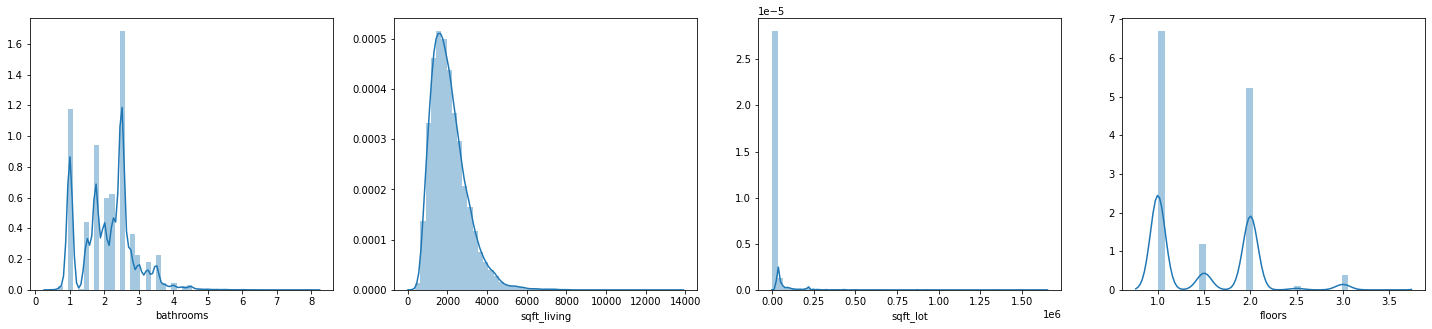

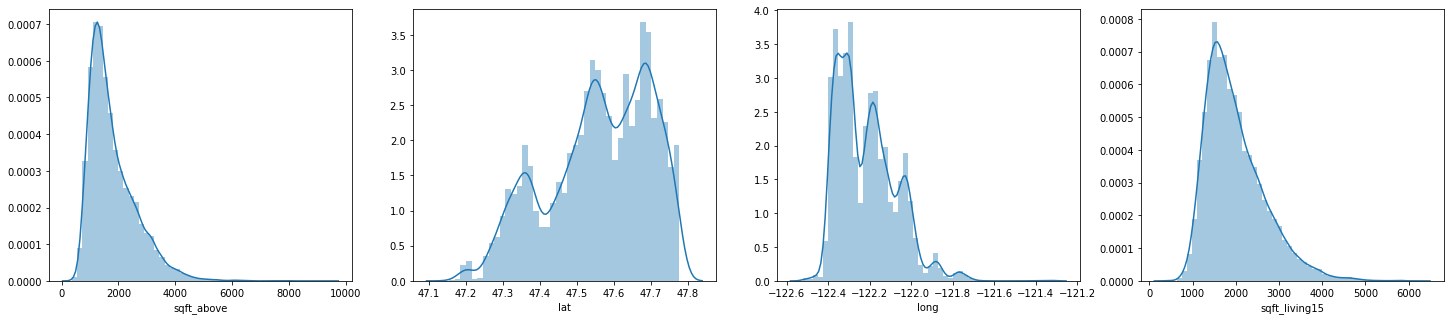

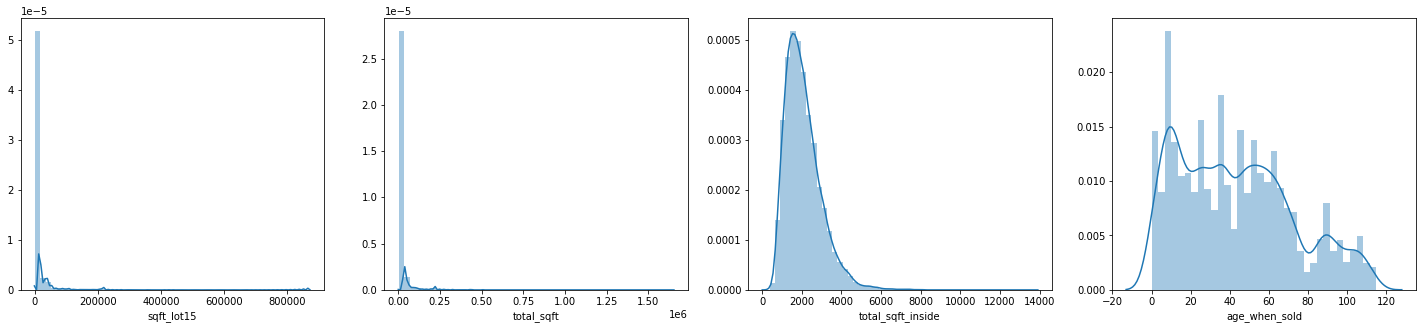

In [471]:
column_list = list(data.columns)

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(25,5))

for feature, ax in zip(column_list[2:6], axes):
    sns.distplot(data[feature], ax=ax)

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(25,5))

for feature, ax in zip(column_list[6:10], axes):
    sns.distplot(data[feature], ax=ax)

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(25,5))

for feature, ax in zip(column_list[10:14], axes):
    sns.distplot(data[feature], ax=ax)

In [472]:
# shows price variable and the price for each percentile
for column in data.columns:
    print(f'{column}')
    print('------------------------------')
    for i in range(0,11):
        q = i/100
        print("{} percentile: {}".format(q,data[column].quantile(q=q)))
    print('\n')

    for i in range(90,101):
        q = i/100
        print("{} percentile: {}".format(q,data[column].quantile(q=q)))
    print('\n')

price
------------------------------
0.0 percentile: 78000.0
0.01 percentile: 158972.0
0.02 percentile: 180000.0
0.03 percentile: 195000.0
0.04 percentile: 205000.0
0.05 percentile: 214030.0
0.06 percentile: 220000.0
0.07 percentile: 229901.00000000003
0.08 percentile: 235000.0
0.09 percentile: 241487.0
0.1 percentile: 248000.0


0.9 percentile: 890000.0
0.91 percentile: 920260.0000000021
0.92 percentile: 957000.0
0.93 percentile: 999998.02
0.94 percentile: 1080000.0
0.95 percentile: 1170000.0
0.96 percentile: 1270000.0
0.97 percentile: 1400000.0
0.98 percentile: 1600000.0
0.99 percentile: 1991399.9999999942
1.0 percentile: 7700000.0


bedrooms
------------------------------
0.0 percentile: 1.0
0.01 percentile: 2.0
0.02 percentile: 2.0
0.03 percentile: 2.0
0.04 percentile: 2.0
0.05 percentile: 2.0
0.06 percentile: 2.0
0.07 percentile: 2.0
0.08 percentile: 2.0
0.09 percentile: 2.0
0.1 percentile: 2.0


0.9 percentile: 4.0
0.91 percentile: 4.0
0.92 percentile: 5.0
0.93 percentile: 5.0
0.

In [473]:
# price
data = data[data['price'] < 1000000]
# bathrooms
data = data[data['bathrooms'] >= 1] 
data = data[data['bathrooms'] <= 5]
# bedrooms
data = data[data['bedrooms'] <= 7]
# sqft_above
data = data[data['sqft_above'] < 4000]
# sqft_living
data = data[data['sqft_living'] < 4000] 
# sqft_living15
data = data[data['sqft_living15'] < 4000] 
# sqft_lot
data = data[data['sqft_lot'] < 20000]
# sqft_lot15
data = data[data['sqft_lot15'] < 20000]
# total_sqft
data = data[data['total_sqft'] < 20000]
# total_sqft_inside
data = data[data['total_sqft_inside'] < 5000]

## After removing outliers

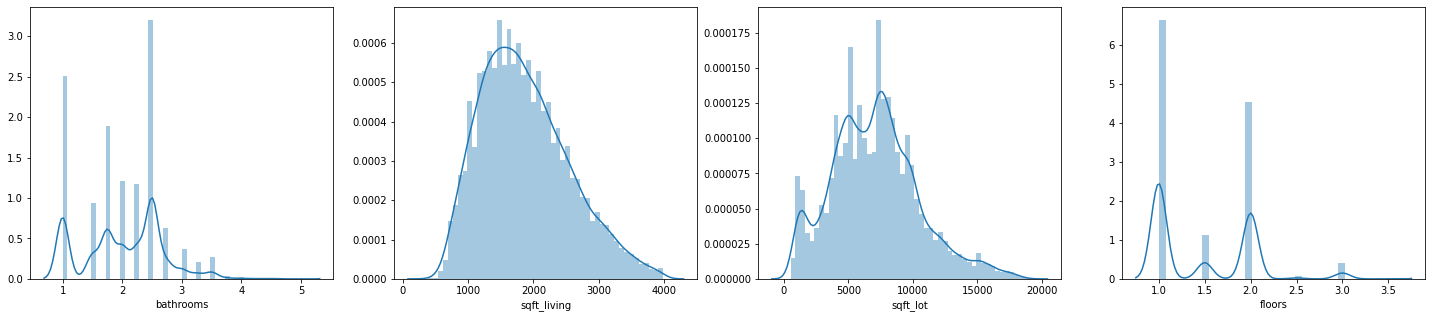

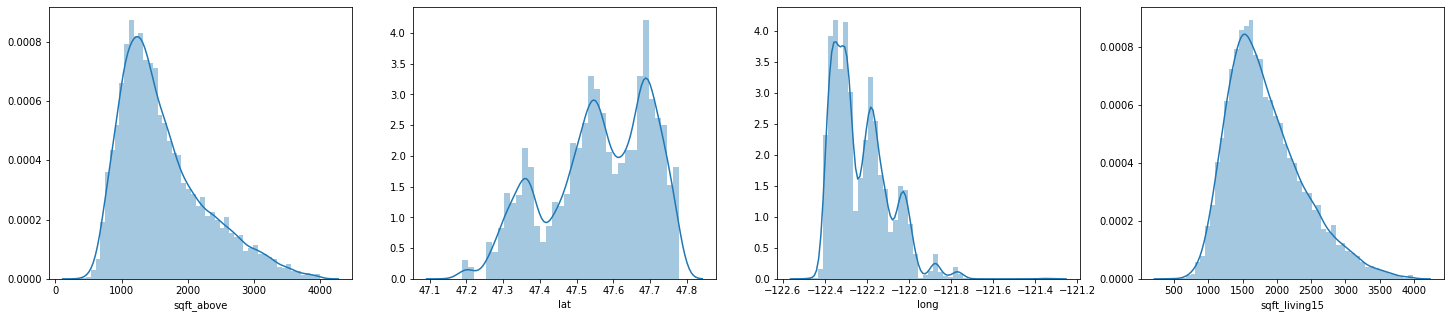

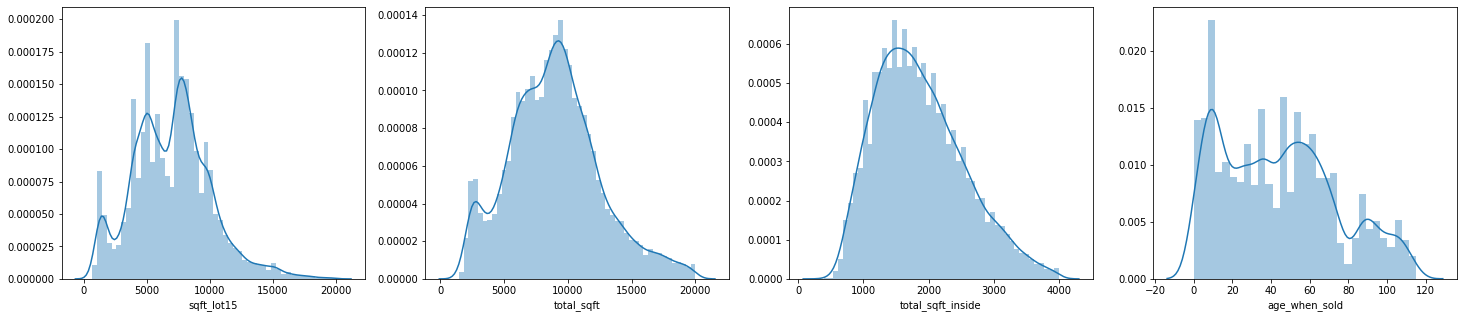

In [474]:
column_list = list(data.columns)

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(25,5))

for feature, ax in zip(column_list[2:6], axes):
    sns.distplot(data[feature], ax=ax)

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(25,5))

for feature, ax in zip(column_list[6:10], axes):
    sns.distplot(data[feature], ax=ax)

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(25,5))

for feature, ax in zip(column_list[10:14], axes):
    sns.distplot(data[feature], ax=ax)

In [475]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,lat,long,sqft_living15,sqft_lot15,total_sqft,total_sqft_inside,age_when_sold
count,15491.00000,15491.00000,15491.00000,15491.00000,15491.00000,15491.00000,15491.00000,15491.00000,15491.00000,15491.00000,15491.00000,15491.00000,15491.00000,15491.00000
mean,456261.41146,3.29346,2.00841,1872.55019,7098.87477,1.47127,1621.03286,47.55947,-122.22806,1841.19799,7007.78187,8971.42496,1867.25331,44.13866
std,189085.63445,0.85509,0.67704,675.52541,3365.51966,0.54371,648.16460,0.13904,0.13308,550.84171,3086.77077,3564.08720,676.07728,29.87149
min,78000.00000,1.00000,1.00000,390.00000,520.00000,1.00000,390.00000,47.15590,-122.50300,460.00000,651.00000,1452.00000,390.00000,0.00000
25%,308000.00000,3.00000,1.50000,1360.00000,4800.00000,1.00000,1140.00000,47.47120,-122.33700,1440.00000,4900.00000,6523.50000,1350.00000,17.00000
50%,424950.00000,3.00000,2.00000,1790.00000,7100.00000,1.00000,1460.00000,47.56900,-122.26700,1740.00000,7200.00000,8880.00000,1780.00000,42.00000
75%,575000.00000,4.00000,2.50000,2300.00000,9085.00000,2.00000,1960.00000,47.68050,-122.15000,2160.00000,8800.00000,11045.00000,2300.00000,64.00000
max,999999.00000,7.00000,5.00000,3990.00000,19000.00000,3.50000,3990.00000,47.77760,-121.31500,3990.00000,19884.00000,19988.00000,3990.00000,115.00000


# 9. Export Cleaned Data

In [476]:
data.to_csv('csv_files/cleaned_data.csv')
dummy_data.to_csv('csv_files/dummy_data.csv')